In [1]:
#Importation librarie 

import numpy as np
import tensorflow
import cv2 as cv
import numpy as np
import os
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.utils import plot_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras import regularizers
from sklearn.metrics import f1_score
import os
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

 

2024-11-12 17:02:07.903780: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import cv2
import os

def extract_frames(base_dir, output_base_dir, labels, rect_width=1500, rect_height=1500, num_images=40):
    """
    Extrait et sauvegarde un nombre spécifié d'images par vidéo dans un rectangle centré.
    
    :param base_dir: Répertoire contenant les dossiers des vidéos par label.
    :param output_base_dir: Répertoire de sortie pour enregistrer les images extraites.
    :param labels: Liste des labels des sous-dossiers à traiter.
    :param rect_width: Largeur du rectangle centré.
    :param rect_height: Hauteur du rectangle centré.
    :param num_images: Nombre d'images à extraire par vidéo.
    """
    
    for label in labels:
        video_folder = os.path.join(base_dir, label)
        output_folder = os.path.join(output_base_dir, label)
        os.makedirs(output_folder, exist_ok=True)
        
        # Parcourir chaque fichier vidéo dans le sous-dossier
        for video_name in os.listdir(video_folder):
            video_path = os.path.join(video_folder, video_name)
            print(f"Traitement de la vidéo : {video_path}")
            
            # Ouvrir la vidéo
            cap = cv2.VideoCapture(video_path)
            total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
            
            # Calcul de l'intervalle pour extraire les images
            interval = max(total_frames // num_images, 1)
            image_count = 0
            
            # Extraire les images
            while cap.isOpened() and image_count < num_images:
                frame_position = image_count * interval
                cap.set(cv2.CAP_PROP_POS_FRAMES, frame_position)
                
                # Lire la frame
                ret, frame = cap.read()
                if not ret:
                    print(f"Fin de la vidéo ou problème de lecture à la frame {frame_position}.")
                    break
                
                # Dimensions de la frame
                frame_height, frame_width = frame.shape[:2]
                
                # Calculer les coordonnées du rectangle centré
                x1 = max((frame_width - rect_width) // 2, 0)
                y1 = max((frame_height - rect_height) // 2, 0)
                x2 = x1 + rect_width
                y2 = y1 + rect_height
                
                # Extraire et sauvegarder le rectangle centré
                cropped_image = frame[y1:y2, x1:x2]
                output_image_path = os.path.join(output_folder, f"{video_name}_img_{image_count + 1}.jpg")
                cv2.imwrite(output_image_path, cropped_image)
                
                print(f"Sauvegardé : {output_image_path}")
                image_count += 1

            # Libérer la vidéo après traitement
            cap.release()
            print(f"Traitement terminé pour la vidéo : {video_path}\n")

    print("Extraction des images terminée pour toutes les vidéos.")


In [3]:
# Utilisation pour l'entraînement
extract_frames(base_dir="./train", output_base_dir="output_images", labels=["no_pregnancy", "pregnancy"])

Traitement de la vidéo : ./train/no_pregnancy/no_pregnancy_1.mp4
Sauvegardé : output_images/no_pregnancy/no_pregnancy_1.mp4_img_1.jpg
Sauvegardé : output_images/no_pregnancy/no_pregnancy_1.mp4_img_2.jpg
Sauvegardé : output_images/no_pregnancy/no_pregnancy_1.mp4_img_3.jpg
Sauvegardé : output_images/no_pregnancy/no_pregnancy_1.mp4_img_4.jpg
Sauvegardé : output_images/no_pregnancy/no_pregnancy_1.mp4_img_5.jpg
Sauvegardé : output_images/no_pregnancy/no_pregnancy_1.mp4_img_6.jpg
Sauvegardé : output_images/no_pregnancy/no_pregnancy_1.mp4_img_7.jpg
Sauvegardé : output_images/no_pregnancy/no_pregnancy_1.mp4_img_8.jpg
Sauvegardé : output_images/no_pregnancy/no_pregnancy_1.mp4_img_9.jpg
Sauvegardé : output_images/no_pregnancy/no_pregnancy_1.mp4_img_10.jpg
Sauvegardé : output_images/no_pregnancy/no_pregnancy_1.mp4_img_11.jpg
Sauvegardé : output_images/no_pregnancy/no_pregnancy_1.mp4_img_12.jpg
Sauvegardé : output_images/no_pregnancy/no_pregnancy_1.mp4_img_13.jpg
Sauvegardé : output_images/no_preg

OpenCV: Couldn't read video stream from file "./train/no_pregnancy/.DS_Store"
OpenCV: Couldn't read video stream from file "./train/pregnancy/.DS_Store"


Sauvegardé : output_images/pregnancy/pregnancy_2.mp4_img_3.jpg
Sauvegardé : output_images/pregnancy/pregnancy_2.mp4_img_4.jpg
Sauvegardé : output_images/pregnancy/pregnancy_2.mp4_img_5.jpg
Sauvegardé : output_images/pregnancy/pregnancy_2.mp4_img_6.jpg
Sauvegardé : output_images/pregnancy/pregnancy_2.mp4_img_7.jpg
Sauvegardé : output_images/pregnancy/pregnancy_2.mp4_img_8.jpg
Sauvegardé : output_images/pregnancy/pregnancy_2.mp4_img_9.jpg
Sauvegardé : output_images/pregnancy/pregnancy_2.mp4_img_10.jpg
Sauvegardé : output_images/pregnancy/pregnancy_2.mp4_img_11.jpg
Sauvegardé : output_images/pregnancy/pregnancy_2.mp4_img_12.jpg
Sauvegardé : output_images/pregnancy/pregnancy_2.mp4_img_13.jpg
Sauvegardé : output_images/pregnancy/pregnancy_2.mp4_img_14.jpg
Sauvegardé : output_images/pregnancy/pregnancy_2.mp4_img_15.jpg
Sauvegardé : output_images/pregnancy/pregnancy_2.mp4_img_16.jpg
Sauvegardé : output_images/pregnancy/pregnancy_2.mp4_img_17.jpg
Sauvegardé : output_images/pregnancy/pregnancy_

In [4]:
# Utilisation pour le test
extract_frames(base_dir="./test", output_base_dir="output_images_test", labels=["no_pregnancy", "pregnancy"])

Traitement de la vidéo : ./test/no_pregnancy/no_pregnancy_3.mp4
Sauvegardé : output_images_test/no_pregnancy/no_pregnancy_3.mp4_img_1.jpg
Sauvegardé : output_images_test/no_pregnancy/no_pregnancy_3.mp4_img_2.jpg
Sauvegardé : output_images_test/no_pregnancy/no_pregnancy_3.mp4_img_3.jpg
Sauvegardé : output_images_test/no_pregnancy/no_pregnancy_3.mp4_img_4.jpg
Sauvegardé : output_images_test/no_pregnancy/no_pregnancy_3.mp4_img_5.jpg
Sauvegardé : output_images_test/no_pregnancy/no_pregnancy_3.mp4_img_6.jpg
Sauvegardé : output_images_test/no_pregnancy/no_pregnancy_3.mp4_img_7.jpg
Sauvegardé : output_images_test/no_pregnancy/no_pregnancy_3.mp4_img_8.jpg
Sauvegardé : output_images_test/no_pregnancy/no_pregnancy_3.mp4_img_9.jpg
Sauvegardé : output_images_test/no_pregnancy/no_pregnancy_3.mp4_img_10.jpg
Sauvegardé : output_images_test/no_pregnancy/no_pregnancy_3.mp4_img_11.jpg
Sauvegardé : output_images_test/no_pregnancy/no_pregnancy_3.mp4_img_12.jpg
Sauvegardé : output_images_test/no_pregnancy/

OpenCV: Couldn't read video stream from file "./test/no_pregnancy/.DS_Store"
OpenCV: Couldn't read video stream from file "./test/pregnancy/.DS_Store"


Sauvegardé : output_images_test/pregnancy/pregnancy_1.mp4_img_3.jpg
Sauvegardé : output_images_test/pregnancy/pregnancy_1.mp4_img_4.jpg
Sauvegardé : output_images_test/pregnancy/pregnancy_1.mp4_img_5.jpg
Sauvegardé : output_images_test/pregnancy/pregnancy_1.mp4_img_6.jpg
Sauvegardé : output_images_test/pregnancy/pregnancy_1.mp4_img_7.jpg
Sauvegardé : output_images_test/pregnancy/pregnancy_1.mp4_img_8.jpg
Sauvegardé : output_images_test/pregnancy/pregnancy_1.mp4_img_9.jpg
Sauvegardé : output_images_test/pregnancy/pregnancy_1.mp4_img_10.jpg
Sauvegardé : output_images_test/pregnancy/pregnancy_1.mp4_img_11.jpg
Sauvegardé : output_images_test/pregnancy/pregnancy_1.mp4_img_12.jpg
Sauvegardé : output_images_test/pregnancy/pregnancy_1.mp4_img_13.jpg
Sauvegardé : output_images_test/pregnancy/pregnancy_1.mp4_img_14.jpg
Sauvegardé : output_images_test/pregnancy/pregnancy_1.mp4_img_15.jpg
Sauvegardé : output_images_test/pregnancy/pregnancy_1.mp4_img_16.jpg
Sauvegardé : output_images_test/pregnancy

In [60]:
datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,
    shear_range=0.2,
    fill_mode='nearest'
    )

In [61]:
# Chargement des données d'entraînement
train_data = datagen.flow_from_directory(
    './output_images',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 119 images belonging to 2 classes.


In [62]:
# Chargement des données de test
test_data = datagen.flow_from_directory(
    './output_images_test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 80 images belonging to 2 classes.


In [63]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential

# Construire un modèle simplifié
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    # Remplacer Flatten par GlobalAveragePooling2D pour réduire les paramètres
    GlobalAveragePooling2D(),
    
    # Réduire la taille de la couche Dense
    Dense(256, activation='relu'),
    
    # Couche de sortie
    Dense(1, activation='sigmoid')

])

model2.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_41 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_42 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_43 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_43 (MaxPooli  (None, 17, 17, 128)      

In [64]:
# Compilation du modèle
model2.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [65]:
# Vérification des valeurs de train_data et test_data
print("train_data.samples:", train_data.samples)
print("train_data.batch_size:", train_data.batch_size)
print("test_data.samples:", test_data.samples)
print("test_data.batch_size:", test_data.batch_size)

history = model2.fit(
        train_data,
        steps_per_epoch=train_data.samples // train_data.batch_size,
        validation_data=test_data,
        validation_steps=test_data.samples // test_data.batch_size,
        epochs=7)



train_data.samples: 119
train_data.batch_size: 32
test_data.samples: 80
test_data.batch_size: 32
Epoch 1/7
3/3 [==============================] - 9s 3s/step - loss: 0.6880 - accuracy: 0.4896 - val_loss: 0.6814 - val_accuracy: 0.5156
Epoch 2/7
3/3 [==============================] - 6s 3s/step - loss: 0.6586 - accuracy: 0.6667 - val_loss: 0.6728 - val_accuracy: 0.5156
Epoch 3/7
3/3 [==============================] - 6s 2s/step - loss: 0.6344 - accuracy: 0.6782 - val_loss: 0.6852 - val_accuracy: 0.4688
Epoch 4/7
3/3 [==============================] - 7s 2s/step - loss: 0.6265 - accuracy: 0.6437 - val_loss: 0.6730 - val_accuracy: 0.5000
Epoch 5/7
3/3 [==============================] - 7s 3s/step - loss: 0.6197 - accuracy: 0.6322 - val_loss: 0.6724 - val_accuracy: 0.5000
Epoch 6/7
3/3 [==============================] - 6s 2s/step - loss: 0.5679 - accuracy: 0.6897 - val_loss: 0.6929 - val_accuracy: 0.4688
Epoch 7/7
3/3 [==============================] - 7s 2s/step - loss: 0.5598 - accuracy: 

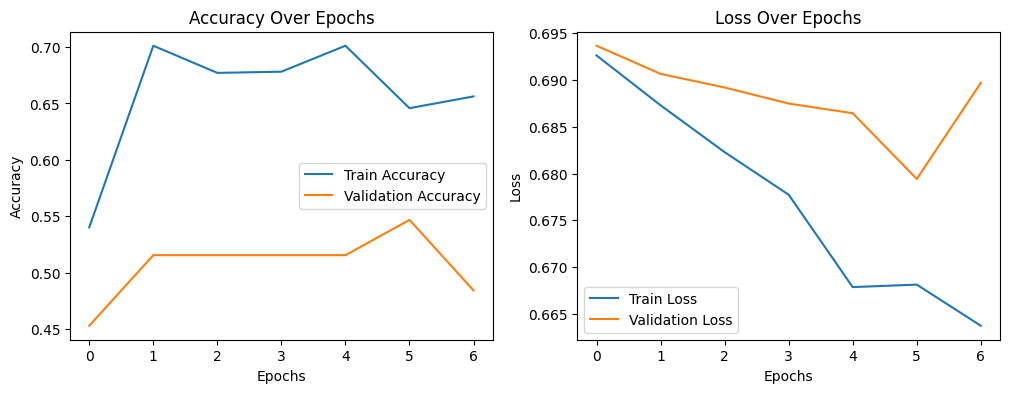

In [32]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    # Précision
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title("Accuracy Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    
    # Perte (loss)
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Loss Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    
    plt.show()

# Après l'entraînement, on appelle cette fonction
plot_training_history(history)
